In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Прочитайте csv файл (використовуйте функцію read_csv)
# Виведіть перші п'ять рядків (використовується функція head)
data = pd.read_csv("bestsellers_with_categories.csv")
data.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [6]:
# Виведіть розміри датасету (використовуйте атрибут shape)
data.shape

(550, 7)

In [7]:
data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [8]:
# Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
na_counts = data.isna().sum()
na_counts
# ні: Чи є в якихось змінних пропуски?

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [13]:
# Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
unique_genres = data['genre'].unique()
print(unique_genres, 'Які є унікальні жанри?')


['Non Fiction' 'Fiction'] Які є унікальні жанри?


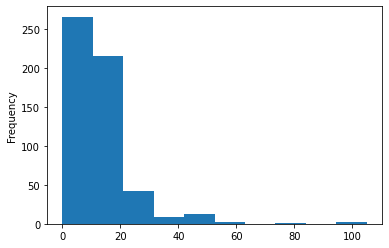

In [10]:
# Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
data['price'].plot(kind='hist', bins=10)
plt.show()

In [12]:
# Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
max_price = data['price'].max()
min_price = data['price'].min()
mean_price = data['price'].mean()
median_price = data['price'].median()

print('Максимальна ціна: ', max_price)
print('Мінімальна ціна: ', min_price)
print('Середня ціна: ', mean_price)
print('Медіанна ціна: ', median_price)

Максимальна ціна:  105
Мінімальна ціна:  0
Середня ціна:  13.1
Медіанна ціна:  11.0


In [14]:
max_rating = data['user_rating'].max()
print('Який рейтинг у датасеті найвищий?:', max_rating)

Який рейтинг у датасеті найвищий?: 4.9


In [16]:
count_5_star = data['user_rating'].value_counts()[4.9]
print('Кількість книг з рейтингом 4.9: ', count_5_star)

Кількість книг з рейтингом 4.9:  52


In [52]:
max_reviews_index = data['reviews'].idxmax()
book_with_max_reviews = data.loc[max_reviews_index, 'name']

print('Книга з найбільшою кількістю відгуків: ', book_with_max_reviews)

Книга з найбільшою кількістю відгуків:  Where the Crawdads Sing


In [51]:
# Сортування книг за рейтінгом
sorted_data = data.sort_values(by='user_rating', ascending=False)

# Фільтрація книг, які потрапили до Топ-50 у 2015 році
data_top_50 = sorted_data.loc[(data['year'] == 2015)]
data_top_50.shape
price_expensive = data_top_50['price'].max()
name_book_exp = sorted_data.loc[price_expensive, 'name']

print('З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча:', name_book_exp)


З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча: Catching Fire (The Hunger Games)


In [63]:
data_top_50 = sorted_data.loc[(data['year'] == 2010) & (data['genre'] == 'Fiction')]
print('Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році:', len(data_top_50))


Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році: 20


In [64]:
filtered_data = data[(data['user_rating'] == 4.9) & (data['year'].isin([2010, 2011]))]
print('Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: ', len(filtered_data))

Кількість книг з рейтингом 4.9 у 2010 та 2011 роках:  1


In [68]:
# Відсортувати за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
filtered_data = data[(data['year'] == 2015) & (data['price'] < 8)]
sorted_data = filtered_data.sort_values('price')
last_book_name = sorted_data.iloc[-1]['name']
print(sorted_data)
print('Остання книга у відсортованому списку: ', last_book_name)

                                                  name              author  \
507                              To Kill a Mockingbird          Harper Lee   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 Words        Roger Priddy   
123                               Giraffes Can't Dance       Giles Andreae   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
478                        The Very Hungry Caterpillar          Eric Carle   
201  Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
28                        Baby Touch and Feel: Animals                  DK   
224                                   Love You Forever       Rob

In [69]:
# Групування даних за жанром та визначення максимальних та мінімальних цін
price_stats = data.groupby('genre')['price'].agg(['max', 'min'])

# Виведення результату
print(price_stats)

             max  min
genre                
Fiction       82    0
Non Fiction  105    0


In [74]:
fiction_max = price_stats.loc['Fiction', 'max']
fiction_min = price_stats.loc['Fiction', 'min']
non_fiction_max = price_stats.loc['Non Fiction', 'max']
non_fiction_min = price_stats.loc['Non Fiction', 'min']

print('Максимальна ціна для жанру Fiction: ', fiction_max)
print('Мінімальна ціна для жанру Fiction: ', fiction_min)
print('Максимальна ціна для жанру Non Fiction: ', non_fiction_max)
print('Мінімальна ціна для жанру Non Fiction: ', non_fiction_min)

Максимальна ціна для жанру Fiction:  82
Мінімальна ціна для жанру Fiction:  0
Максимальна ціна для жанру Non Fiction:  105
Мінімальна ціна для жанру Non Fiction:  0
